<h1 style="margin: auto; padding: 20px 0; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; text-align: center"> Produisez une étude de marché</h2>

<h2 style="margin: auto; padding: 20px; text-align: center"><span style="color: #ff0000ff"><u>Préparation, nettoyage et analyse exploratoire des données</u></span> </h2>

In [2]:
#Importation des librairies
import pandas as pd                                                                        
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
sns.set()

In [3]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

<h3 style="margin: auto; padding: 20px; text-align: center"><span style="color: #ff0000ff">Analyse du fichier "Disponibilité Alimentaire"</span></h3>

In [5]:
dispo = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
dispo.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [6]:
# Nombre de lignes et de colonnes
dispo.shape

(176600, 14)

In [7]:
# Info sur le type et le nom de chaque colonne
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [8]:
# Détécter si valeurs nulles
dispo.isna().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

In [9]:
# Détecter si doublons
dispo.duplicated().sum()

0

In [10]:
# Combien de valeurs uniques dans chaque colonne
dispo.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [11]:
# Description chiffrée des données
dispo.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


In [12]:
# Conserver uniquement les colonnes nécessaires
dispo = dispo[['Zone','Élément','Produit','Année','Unité','Valeur']]
dispo.head()

,Zone,Élément,Produit,Année,Unité,Valeur
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0


In [13]:
# Apercu des valeurs de la colonne "Produit"
dispo['Produit'].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [14]:
# Conserver uniquement ce qui nous intéresse pour notre étude > "Viande de Volailles"
dispo = dispo.loc[dispo['Produit'] == 'Viande de Volailles' ,:]
dispo.head()

,Zone,Élément,Produit,Année,Unité,Valeur
651,Afghanistan,Production,Viande de Volailles,2017,Milliers de tonnes,28.0
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.0
653,Afghanistan,Variation de stock,Viande de Volailles,2017,Milliers de tonnes,0.0
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.0
655,Afghanistan,Pertes,Viande de Volailles,2017,Milliers de tonnes,2.0


In [15]:
# Aperçu des valeurs de la colonne "Élément"
dispo['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Disponibilité intérieure', 'Pertes', 'Résidus', 'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Exportations - Quantité', 'Alimentation pour touristes',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Aliments pour animaux', 'Semences'], dtype=object)

In [16]:
# Création d'une liste pour conserver les éléments utiles
liste = ('Importations - Quantité','Disponibilité intérieure',
        'Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)',
        'Exportations - Quantité')

In [17]:
# Conserver les éléments cités dans la liste
dispo = dispo.loc[dispo['Élément'].isin(liste) , :]
dispo.head()

,Zone,Élément,Produit,Année,Unité,Valeur
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.00
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,2017,Milliers de tonnes,57.00
659,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Viande de Volailles,2017,Kcal/personne/jour,5.00
660,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Viande de Volailles,2017,g/personne/jour,0.54
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,514.00


In [18]:
# Dataframe en pivot selon "Élément"
dispo_pivot = dispo.pivot(index = 'Zone', columns = 'Élément', values = 'Valeur')
dispo_pivot.head(20)

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,,
Afghanistan,5.0,0.54,57.0,NaN,29.0
Afrique du Sud,143.0,14.11,2118.0,63.0,514.0
Albanie,85.0,6.26,47.0,0.0,38.0
Algérie,22.0,1.97,277.0,0.0,2.0
Allemagne,71.0,7.96,1739.0,646.0,842.0
Angola,35.0,3.60,319.0,0.0,277.0
Antigua-et-Barbuda,233.0,17.77,7.0,0.0,7.0
Arabie saoudite,151.0,15.57,1435.0,10.0,722.0
Argentine,182.0,13.53,1962.0,207.0,8.0


In [19]:
# Valeurs nulles dans nouveau dataframe
dispo_pivot.isna().sum()

Élément
Disponibilité alimentaire (Kcal/personne/jour)               0
Disponibilité de protéines en quantité (g/personne/jour)     0
Disponibilité intérieure                                     2
Exportations - Quantité                                     37
Importations - Quantité                                      2
dtype: int64

In [20]:
dispo_pivot = dispo_pivot.fillna(dispo_pivot.mean())
dispo_pivot.head()

Élément,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,,
Afghanistan,5.0,0.54,57.0,132.185185,29.0
Afrique du Sud,143.0,14.11,2118.0,63.000000,514.0
Albanie,85.0,6.26,47.0,0.000000,38.0
Algérie,22.0,1.97,277.0,0.000000,2.0
Allemagne,71.0,7.96,1739.0,646.000000,842.0


<div >
<h3 style="margin: auto; padding: 20px;text-align : center "><span style="color: #ff0000ff">Analyse du fichier "Population"</span></h3>
</div>

In [23]:
population = pd.read_csv("Population_2000_2018.csv")
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [24]:
# Nombre de lignes et de colonnes
population.shape

(4411, 15)

In [25]:
# Conserver uniquement l'année 2017
population = population.loc[population['Année'] == 2017 ,:]
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
17,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
36,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
55,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,2884.169,X,Sources internationales sûres,NaN
74,OA,Séries temporelles annuelles,4,Algérie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,41389.189,X,Sources internationales sûres,NaN
93,OA,Séries temporelles annuelles,79,Allemagne,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,82658.409,X,Sources internationales sûres,NaN


In [26]:
# Détécter si valeurs nulles
population.isna().sum()

Code Domaine                0
Domaine                     0
Code zone                   0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      235
dtype: int64

In [27]:
# Conserver uniquement les colonnes nécessaires
population = population[['Zone','Valeur']]
population.head()

,Zone,Valeur
17,Afghanistan,36296.113
36,Afrique du Sud,57009.756
55,Albanie,2884.169
74,Algérie,41389.189
93,Allemagne,82658.409


In [28]:
# Renommer colonne "Valeur" en "Population"
population = population.rename(columns={'Valeur':'Population'})

In [29]:
# Multiplier colonne "Population" *1000 pour une bonne unité de mesure
population['Population'] = population['Population'] * 1000
population.head()

,Zone,Population
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0


In [30]:
# Info sur le type de chaque colonne
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 17 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        236 non-null    object 
 1   Population  236 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [31]:
# Changement du type de la colonne Population en int64
population['Population'] = population['Population'].astype('int64')

In [32]:
# Description chiffrées des données
population.describe()

,Population
count,2.360000e+02
mean,3.198362e+07
std,1.318949e+08
min,7.930000e+02
25%,3.803032e+05
50%,5.203510e+06
75%,1.930842e+07
max,1.421022e+09


In [33]:
# Aperçu des pays les moins peuplés
population.sort_values('Population', ascending=True).head(50)

,Zone,Population
3672,Saint-Siège,793
4143,Tokélaou,1300
2896,Nioué,1609
1781,Îles Falkland (Malvinas),3068
2725,Montserrat,4984
3653,Saint-Pierre-et-Miquelon,5887
3569,"Sainte-Hélène, Ascension et Tristan da Cunha",6008
3550,Saint-Barthélemy,9784
2801,Nauru,10573
4257,Tuvalu,11370


In [34]:
# Conserver uniquement pays ayant plus de 250.000 habitants
population = population.loc[population['Population'] >= 250000, :]

In [35]:
population.shape

(187, 2)

In [36]:
# Visualisation des pays les plus peuplés
population.sort_values('Population', ascending=False).head(10)

,Zone,Population
823,"Chine, continentale",1421021791
1952,Inde,1338676785
1230,États-Unis d'Amérique,325084756
1971,Indonésie,264650963
3029,Pakistan,207906209
595,Brésil,207833823
2877,Nigéria,190873244
378,Bangladesh,159685424
1268,Fédération de Russie,145530082
2123,Japon,127502725


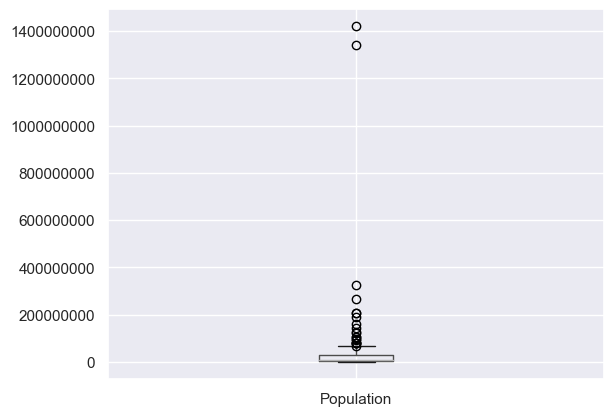

In [37]:
# Visualiser si les 1er pays peuvent être considérés comme outliers
population.boxplot()
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Avec cette visualisation, on peut considérer que la Chine et l'Inde sont des outliers au vu de leur valeurs.

In [38]:
population.drop(population[(population['Zone'] == 'Chine, continentale') | (population['Zone'] == 'Inde')]
                .index, inplace=True)

In [39]:
population.sort_values('Population', ascending=False).head()

,Zone,Population
1230,États-Unis d'Amérique,325084756
1971,Indonésie,264650963
3029,Pakistan,207906209
595,Brésil,207833823
2877,Nigéria,190873244


<div >
    <h3 style="margin: auto; padding: 20px;text-align: center "><span style="color: #ff0000ff">Jointure</span></h3>
</div>

In [77]:
# Jointure du fichier "dispo" et "population"
dispo_pop = pd.merge(population, dispo_pivot, on='Zone', how='inner')
dispo_pop.head()

,Zone,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
0,Afghanistan,36296113,5.0,0.54,57.0,132.185185,29.0
1,Afrique du Sud,57009756,143.0,14.11,2118.0,63.000000,514.0
2,Albanie,2884169,85.0,6.26,47.0,0.000000,38.0
3,Algérie,41389189,22.0,1.97,277.0,0.000000,2.0
4,Allemagne,82658409,71.0,7.96,1739.0,646.000000,842.0


In [78]:
dispo_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      161 non-null    object 
 1   Population                                                161 non-null    int64  
 2   Disponibilité alimentaire (Kcal/personne/jour)            161 non-null    float64
 3   Disponibilité de protéines en quantité (g/personne/jour)  161 non-null    float64
 4   Disponibilité intérieure                                  161 non-null    float64
 5   Exportations - Quantité                                   161 non-null    float64
 6   Importations - Quantité                                   161 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.1+ KB


In [79]:
# Exportation du nouveau dataframe
df = pd.DataFrame(dispo_pop)
df.to_csv(r"D:\FORMATION\DATA FORMATION\Projet 9\dispo_pop.csv", index=False)
print(df)

                                                  Zone  Population  \
0                                          Afghanistan    36296113   
1                                       Afrique du Sud    57009756   
2                                              Albanie     2884169   
3                                              Algérie    41389189   
4                                            Allemagne    82658409   
5                                               Angola    29816766   
6                                      Arabie saoudite    33101178   
7                                            Argentine    43937140   
8                                              Arménie     2944791   
9                                            Australie    24584620   
10                                            Autriche     8819901   
11                                         Azerbaïdjan     9845320   
12                                             Bahamas      381755   
13                  

<h3 style="margin: auto; padding: 20px; text-align: center; "><span style="color: #ff0000ff"> ACP : Analyse en Composantes Principales</span></h3>

In [80]:
data = dispo_pop.set_index('Zone')
data.head()

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
Zone,,,,,,
Afghanistan,36296113,5.0,0.54,57.0,132.185185,29.0
Afrique du Sud,57009756,143.0,14.11,2118.0,63.000000,514.0
Albanie,2884169,85.0,6.26,47.0,0.000000,38.0
Algérie,41389189,22.0,1.97,277.0,0.000000,2.0
Allemagne,82658409,71.0,7.96,1739.0,646.000000,842.0


<div >
<h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">1. Séparer les données</span></h3>
</div>

In [47]:
# Séparer les données
X = data.values

In [48]:
# Enregistrer les index et colonnes dans des variables
names = data.index
features = data.columns

<div >
    <h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">2. Scaling</span></h3>
</div>

In [49]:
# Instancier
scaler = StandardScaler()

In [50]:
# Fit
scaler.fit(X)

StandardScaler()

In [51]:
# Transformer
X_scaled = scaler.transform(X)
X_scaled

array([[ 1.58251900e-01, -1.17910007e+00, -1.20167621e+00,
        -3.10846293e-01, -2.83535644e-03, -3.37673900e-01],
       [ 5.85331037e-01,  1.34204759e+00,  1.44125902e+00,
         8.71929033e-01, -1.51032746e-01,  2.24303616e+00],
       [-5.30644021e-01,  2.82434807e-01, -8.76312968e-02,
        -3.16585135e-01, -2.85981225e-01, -2.89784435e-01],
       [ 2.63262231e-01, -8.68523911e-01, -9.23164985e-01,
        -1.84591770e-01, -2.85981225e-01, -4.81342294e-01],
       [ 1.11416146e+00,  2.66662032e-02,  2.43465969e-01,
         6.54426923e-01,  1.09777620e+00,  3.98834110e+00],
       [ 2.46590833e-02, -6.31024493e-01, -6.05701136e-01,
        -1.60488634e-01, -2.85981225e-01,  9.81946913e-01],
       [ 9.23779216e-02,  1.48820108e+00,  1.72561314e+00,
         4.79966128e-01, -2.64560831e-01,  3.34981490e+00],
       [ 3.15796530e-01,  2.05454585e+00,  1.32829642e+00,
         7.82403098e-01,  1.57420921e-01, -4.49415984e-01],
       [-5.29394102e-01, -2.83909959e-01, -2.473

In [52]:
# Vérification de la moyenne à 0 et de l'écart type à 1
pd.DataFrame(X_scaled).describe().round(2)

,0,1,2,3,4,5
count,161.00,161.00,161.00,161.00,161.00,161.00
mean,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.58,-1.27,-1.30,-0.34,-0.29,-0.49
25%,-0.51,-0.91,-0.92,-0.32,-0.29,-0.48
50%,-0.38,-0.14,-0.08,-0.28,-0.27,-0.39
75%,0.05,0.61,0.60,-0.12,-0.00,-0.02
max,6.11,3.00,4.12,10.14,8.76,5.20


<div >
    <h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">3. ACP</span></h3>
</div>

In [53]:
# Calcul des composantes 
n_components = 4

In [54]:
# Instancier l'ACP
pca = PCA(n_components = n_components)

In [55]:
# Entrainer sur nos données scalées
pca.fit(X_scaled)

PCA(n_components=4)

<div >
<h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">4. Variance expliquée</span></h3>
</div>

In [56]:
pca.explained_variance_ratio_

array([0.48520456, 0.27379655, 0.14938294, 0.0683242 ])

Ici, la 1ère composante capte 48% de la variance de nos données initiales, la 2ème capte 27% etc...

In [57]:
# Enregistrer dans une variable
scree = (pca.explained_variance_ratio_ *100).round(2)
scree

array([48.52, 27.38, 14.94,  6.83])

In [58]:
# Somme cumulée des composantes
scree_cum = scree.cumsum().round()
scree_cum

array([49., 76., 91., 98.])

In [59]:
# Définir une variable avec la liste des composantes
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

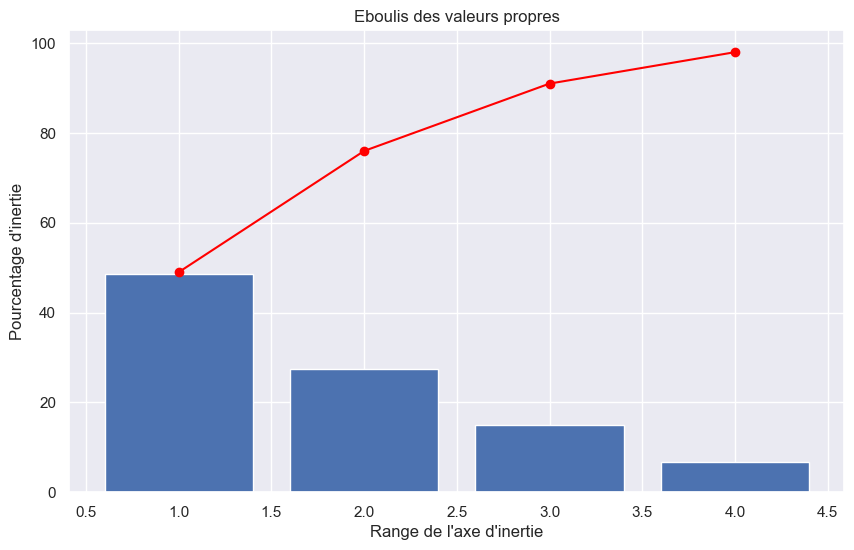

In [60]:
# Affichage du graphique
plt.figure(figsize=(10,6))
plt.bar(x_list,scree)
plt.plot(x_list, scree_cum, c="red", marker='o')
plt.xlabel("Range de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

En bleu, on a la variance de chaque nouvelle composante.

En rouge, on a la variance cumulée.

On voit, que près de 80% est comprise dans les 2 premières composantes.

<div >
    <h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">5. Composantes</span></h3>
</div>

In [61]:
pcs = pca.components_
pcs

array([[ 0.36940294,  0.4143478 ,  0.40424254,  0.51374459,  0.45204018,
         0.24529882],
       [ 0.48135996, -0.52442689, -0.54760242,  0.30124638,  0.29822069,
        -0.11711386],
       [ 0.13702582, -0.1682243 , -0.10974892, -0.10944288, -0.24156113,
         0.93303278],
       [ 0.67650641,  0.15342423,  0.12686115, -0.00987165, -0.67011539,
        -0.23141791]])

In [62]:
# Transformer en dataframe
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5
0,0.369403,0.414348,0.404243,0.513745,0.452040,0.245299
1,0.481360,-0.524427,-0.547602,0.301246,0.298221,-0.117114
2,0.137026,-0.168224,-0.109749,-0.109443,-0.241561,0.933033
3,0.676506,0.153424,0.126861,-0.009872,-0.670115,-0.231418


In [63]:
# Ajouter le nom des colonnes et les index
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Population,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité
F1,0.37,0.41,0.40,0.51,0.45,0.25
F2,0.48,-0.52,-0.55,0.30,0.30,-0.12
F3,0.14,-0.17,-0.11,-0.11,-0.24,0.93
F4,0.68,0.15,0.13,-0.01,-0.67,-0.23


In [64]:
# Affichage avec autre point de vue
pcs.T

,F1,F2,F3,F4
Population,0.369403,0.481360,0.137026,0.676506
Disponibilité alimentaire (Kcal/personne/jour),0.414348,-0.524427,-0.168224,0.153424
Disponibilité de protéines en quantité (g/personne/jour),0.404243,-0.547602,-0.109749,0.126861
Disponibilité intérieure,0.513745,0.301246,-0.109443,-0.009872
Exportations - Quantité,0.452040,0.298221,-0.241561,-0.670115
Importations - Quantité,0.245299,-0.117114,0.933033,-0.231418


<div >
<h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">6. Cercle de corrélation</span></h3>
</div>

In [66]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.05,
                head_length=0.05, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i], fontsize=10)
        
    # Afficher les lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du graphique
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))

    plt.axis('equal')
    plt.show(block=False)

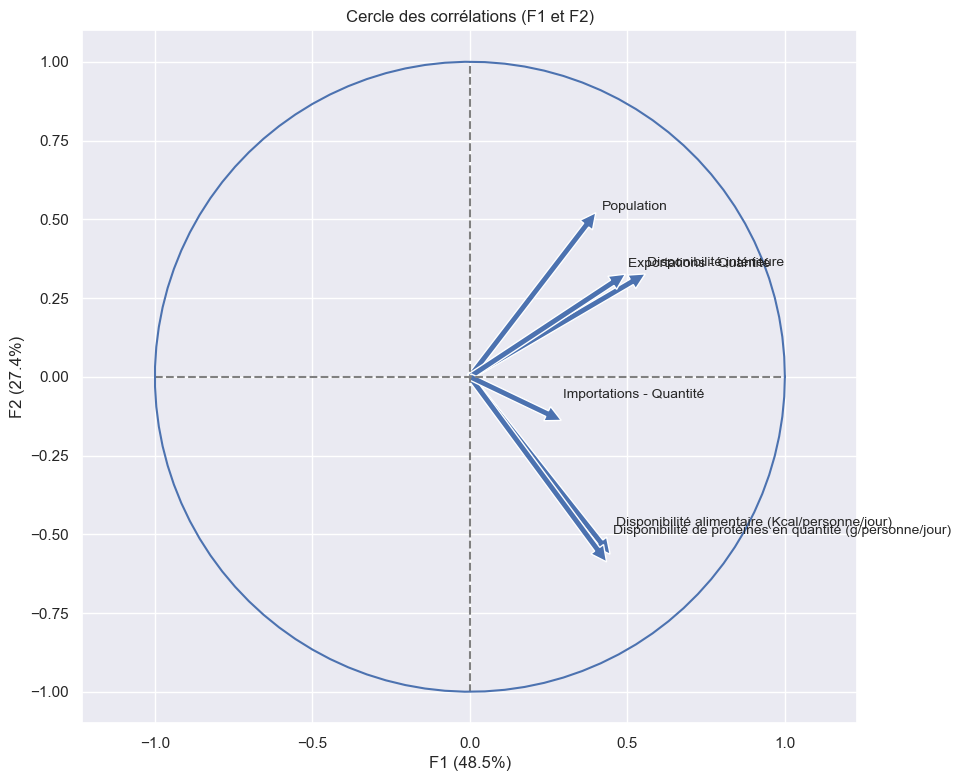

In [67]:
x_y = (0,1)
correlation_graph(pca, x_y, features)

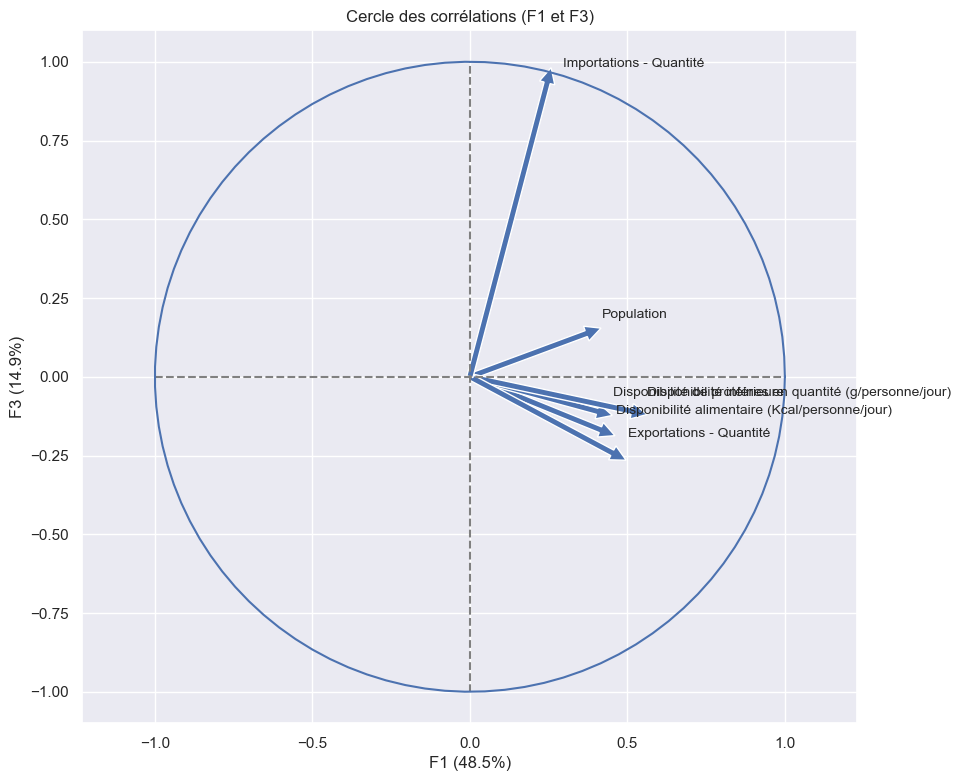

In [68]:
x_y = (0,2)
correlation_graph(pca, x_y, features)

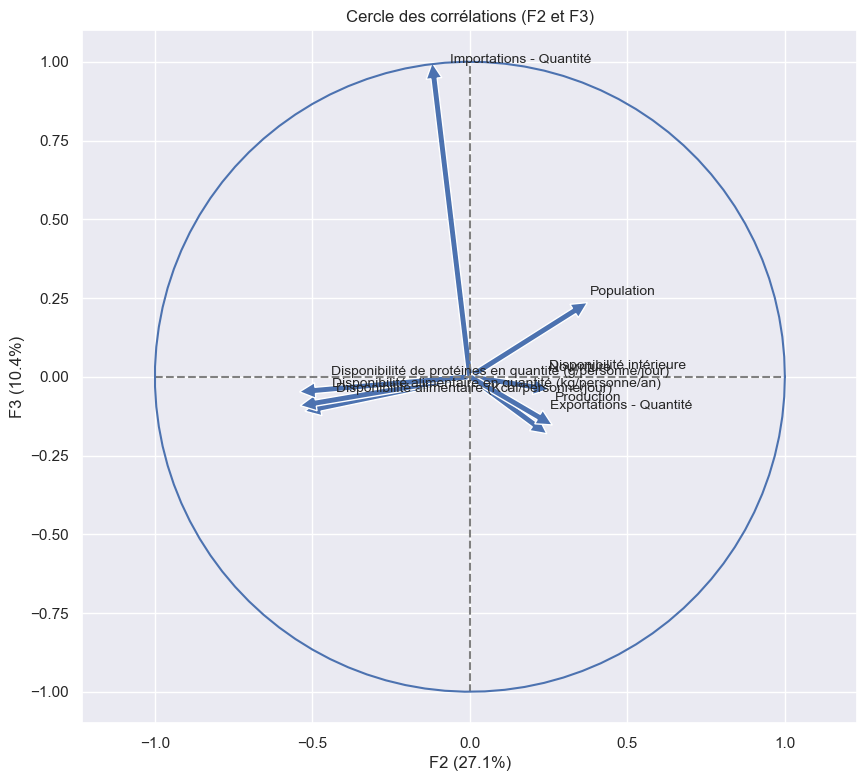

In [63]:
x_y = (1,2)
correlation_graph(pca, x_y, features)

<div >
    <h3 style="margin-left: 60px; padding: 20px; "><span style="color: #ff0000ff">7. Projection</span></h3>
</div>

In [70]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.15967576,  1.29762813,  0.07156456, -0.14317775],
       [ 2.28480576, -1.2563541 ,  1.73014728,  0.35824585],
       [-0.4774222 , -0.50227795, -0.27725533, -0.0649418 ],
       [-0.97798441,  1.0032073 , -0.07632702,  0.23258607],
       [ 2.3318255 ,  0.44643899,  3.5059134 , -0.87635556]])

In [71]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de 
    chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transformer X_projected en np.array
    X_ = np.array(X_projected)

    # Définir la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # Gérer les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # Vérifier la variable axis 
    if not len(x_y) == 2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y ) >= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # Définir x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Vérifier s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Afficher les lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Afficher les labels des points
    if len(labels) : 
    
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

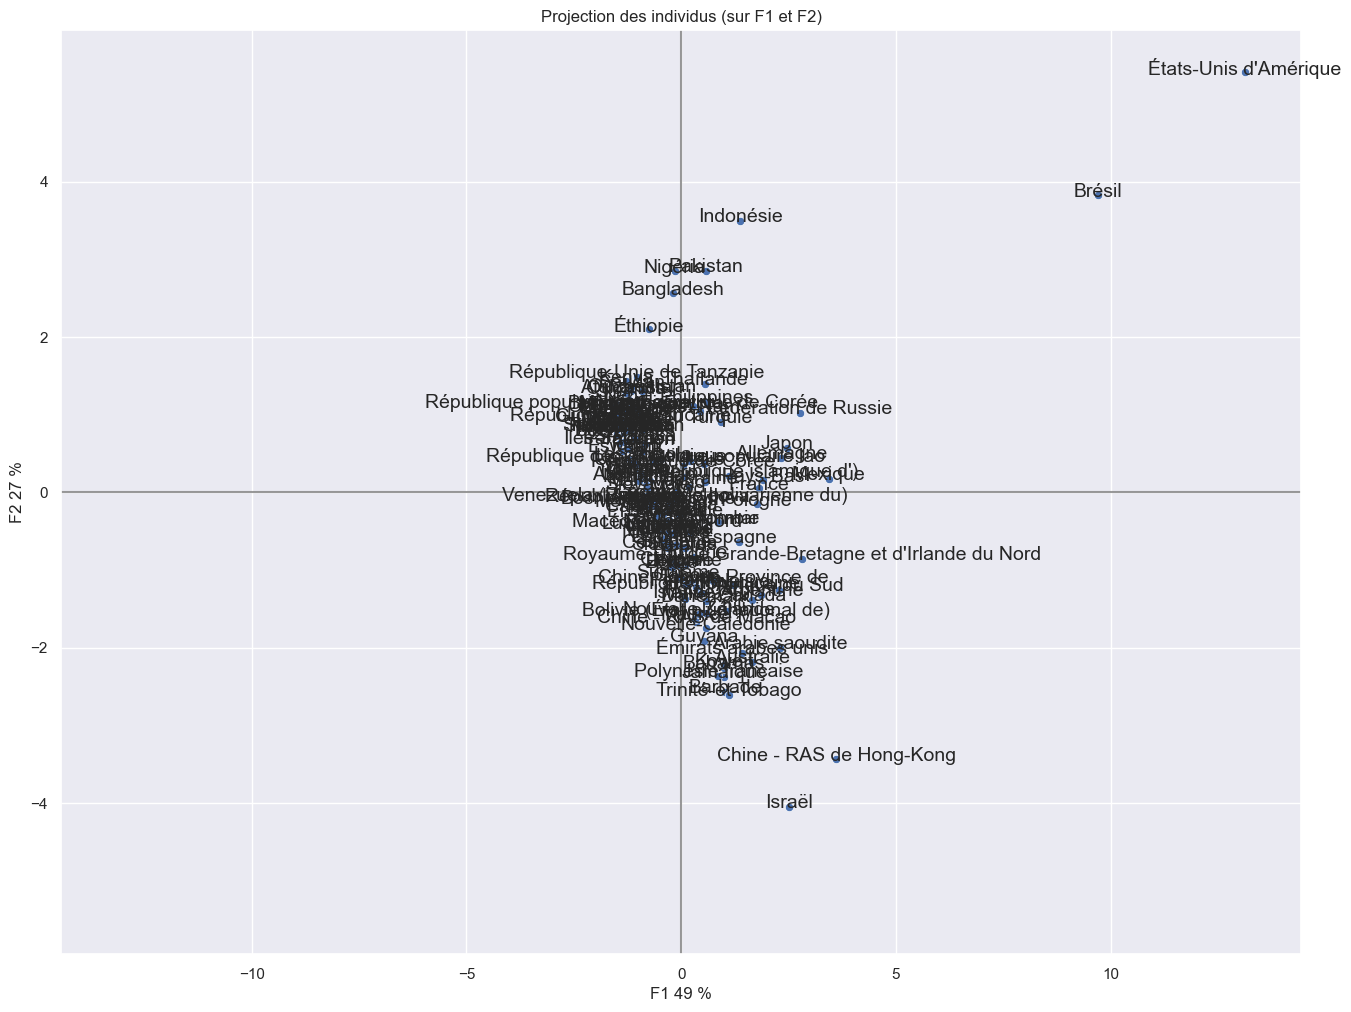

In [72]:
display_factorial_planes(X_proj, (0,1), pca, labels=names, figsize=(16,12), marker="o")

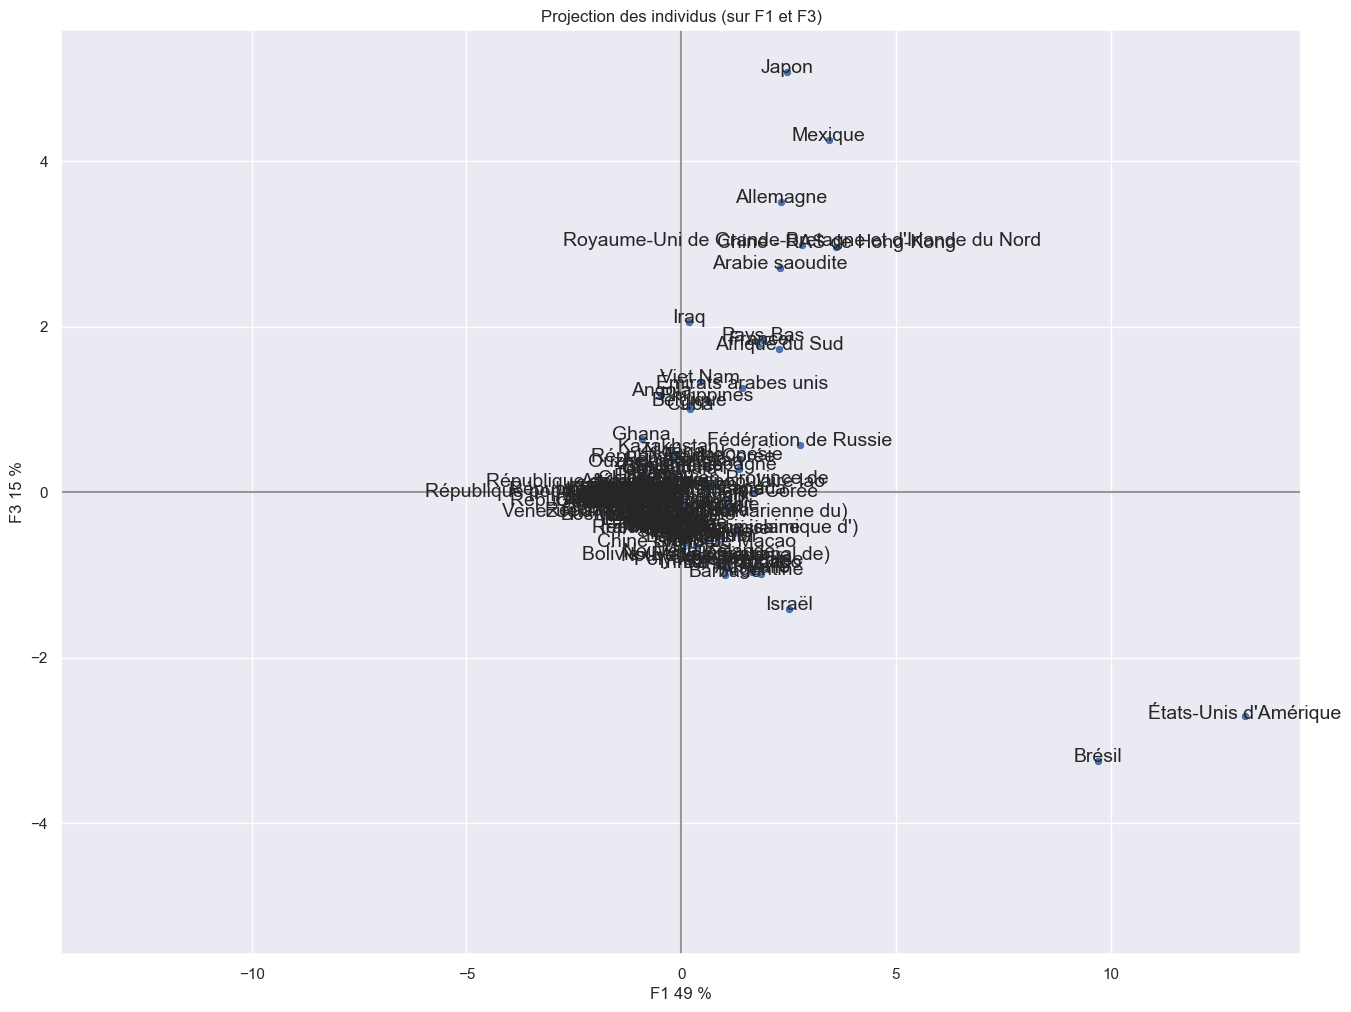

In [73]:
display_factorial_planes(X_proj, (0,2), pca, labels=names, figsize=(16,12), marker="o")

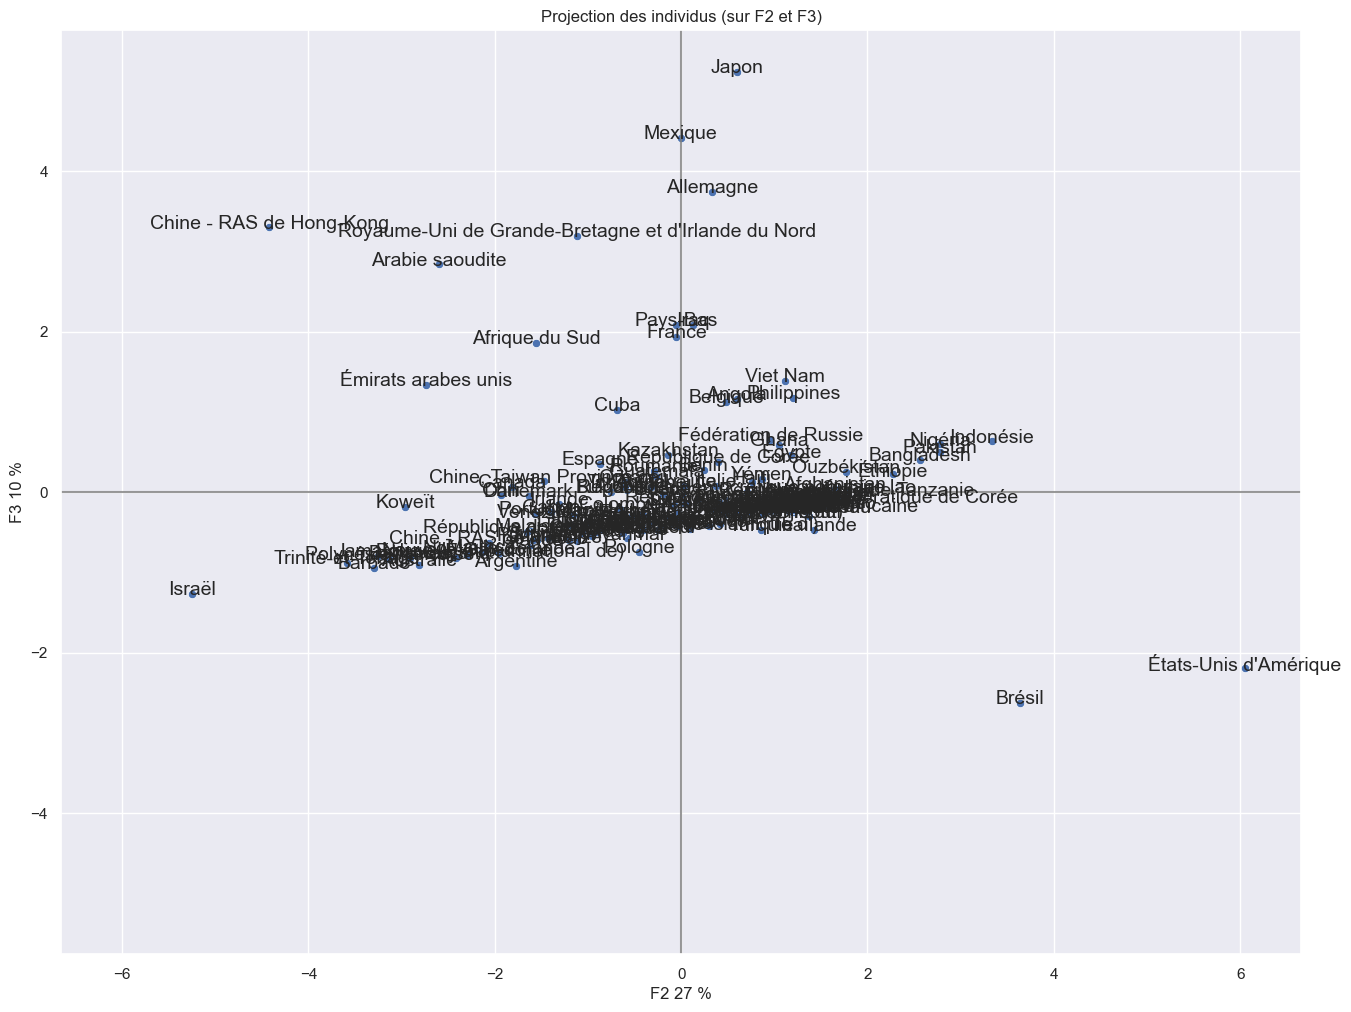

In [68]:
display_factorial_planes(X_proj, (1,2), pca, labels=names, figsize=(16,12), marker="o")

On constate que le Brésil et les Etats-Unis d'Amérique sont excentrés sur les 3 graphiques. 
A verifier plus tard si ce sont des outliers ou non.